<a href="https://colab.research.google.com/github/HermesJunior/studies-projects-public-/blob/master/Airbnb_(Bergamo_Italia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise dos Dados do Airbnb - Bergamo, Lombardia, Italia
*Hermes Luiz Bolinelli Junior*

---
# Sobre o Airbnb   <left><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Apesar desta posição de destaque ele **não possui nenhum hotel**!

Oferecendo um serviço que conecta pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras e os métodos de hospedagens tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Portano, por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Neste *notebook*, iremos analisar os dados brutos disponibilizados por este portal referentes à cidade de Bérgamo, Lombardia. Localizada no Norte da itália, região esta que sofreu com a Pandemia COVID-19.**

# Bérgamo   <left>

Bérgamo (em italiano: Bergamo; Bèrghem no dialeto local) é uma comuna italiana da região da Lombardia, capital da província homônima, com cerca de 121.639 habitantes. Estende-se por uma área de 38.8 km², tendo uma densidade populacional de 3.135,03 hab/km². Faz fronteira com Azzano San Paolo, Curno, Gorle, Lallio, Mozzo, Orio al Serio, Paladina, Ponteranica, Seriate, Sorisole, Stezzano, Torre Boldone, Treviolo, Valbrembo.

A cidade se divide em duas partes distintas, a Città Alta (Sìta Ólta), o centro histórico cercado por uma muralha, e a Città Bassa (Sìta Bàsa), a parte moderna.

Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/B%C3%A9rgamo)

<p><a href="https://commons.wikimedia.org/wiki/File:LOM-Mappa.png#/media/Ficheiro:LOM-Mappa.png"><img width="30%" src="https://upload.wikimedia.org/wikipedia/commons/d/d0/LOM-Mappa.png"<center> </a><br>

## Obtenção dos Dados

Como já mecionado todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será utilizado o arquivo:

* `listings.csv` - *Summary information and metrics for listings in Bergamo (good for visualisations).' acessado em 2020/06/12 22h30*

Portanto o storytell foi escrito com base no arquivo acessado neste dia e horário.

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/lombardia/bergamo/2020-05-30/visualisations/listings.csv")

## Análise dos Dados

O arquivo disponibilizado pela airbnb possuir 2,473 registros e 16 variáveis.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias



In [ ]:
# Quantidade de registros e variaveis do arquivo 'listings.csv'
df.shape

(2473, 16)

In [ ]:
# Primeiros 5 primeiras registros do arquivo 'listings.csv'
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15526,Ca' laRipa: Residenza PALAZZO lake view,60754,"Andrea, Maurizio, And Tina",NaN,Solto Collina,45.78464,10.02629,Entire home/apt,82,3,34,2019-07-25,0.31,5,73
1,15542,Ca' laRipa: Suite PANORAMA facing the lake,60754,"Andrea, Maurizio, And Tina",NaN,Solto Collina,45.78354,10.02471,Entire home/apt,59,3,39,2020-02-07,0.40,5,126
2,31412,Cute and Cosy Terrace,134937,Elena,NaN,Bergamo,45.69052,9.67099,Entire home/apt,69,1,79,2020-02-23,0.79,8,316
3,116423,Casetta a 12km da lago d'iseo,588254,Angela,NaN,Bossico,45.82840,10.04476,Entire home/apt,41,10,8,2019-11-03,0.33,3,363
4,130750,Nice apartment on quiet hill,643554,Sergio,NaN,Rota d'Imagna,45.83829,9.51059,Entire home/apt,50,7,0,NaN,NaN,1,358


## **Dados de Entrada do arquivo 'listings.csv'**

Vamos identificar os tipos das variaveis de cada coluna que nosso conjunto de dados possui.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com muitas mais registros dos que aqui utilizados e 106 variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 2473
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Valores ausentes no *dataset***

Abaixo abalisamos a quantaidade de valores ausentes do nosso *dataset*.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem 24,22% das linhas com valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.242216
last_review                       0.242216
host_name                         0.000404
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Histograma das Variaveis** 


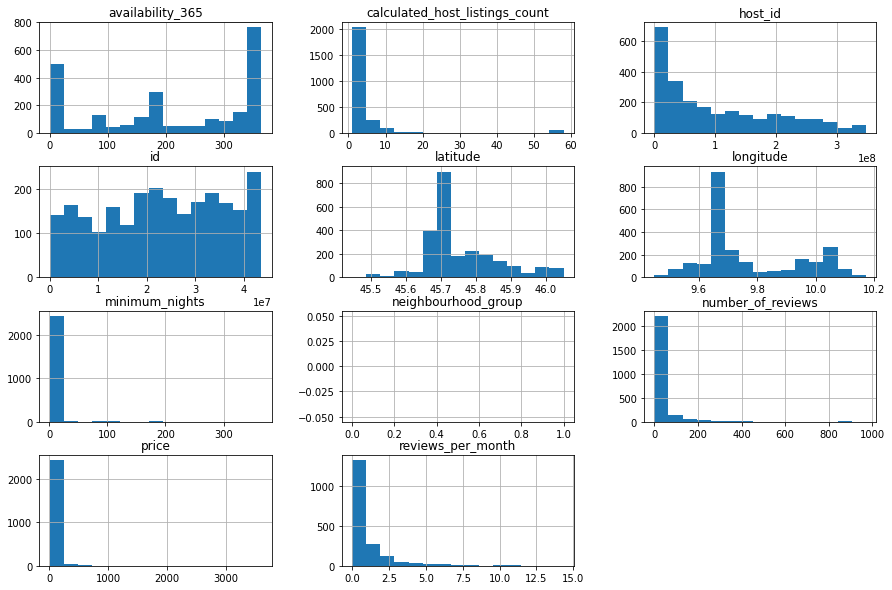

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Análise de *Outliers***

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*: `price`, `minimum_nights`, `calculated_host_listings_count` e 'reviews_per_month'.

Essas variáveis precisam ser melhor analisadas. Para isso iremos utilizar:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2473.000000,2473.000000,2473.000000,1874.000000,2473.000000,2473.000000
mean,75.549535,3.022240,24.096644,1.007049,4.069956,208.430247
std,113.415299,11.709706,57.264467,1.581936,8.829812,138.721967
min,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,45.000000,1.000000,1.000000,0.150000,1.000000,88.000000
50%,60.000000,1.000000,4.000000,0.390000,2.000000,210.000000
75%,80.000000,2.000000,22.000000,1.160000,4.000000,354.000000
max,3600.000000,365.000000,970.000000,14.330000,58.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 80, porém seu valor máximo é 3600.
* A quantidade mínima de noites (`minimum_nights`) possui valores com 365 dias no ano. Observe, também, que o quartil de 75% é para 2 noites (75% são alugados para 2 noites).
* A variável 'calculated_host_listings_count' possui um valor de 58.00 para uma média de 4.069.

Estas variáveis estão desbalanceadas, o que vai exigir algumas ações nestas, como por exemplo, obter mais registros.

#### Boxplot para minimum_nights


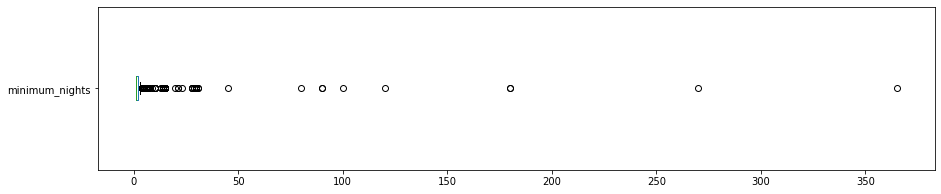

minimum_nights: valores acima de 30 noites:
12 entradas
0.4852%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30 noites:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

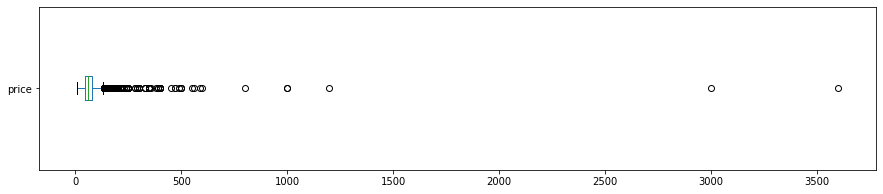


price: valores acima de U$ 1500
2 entradas
0.0809%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de U$ 1500 para price
print("\nprice: valores acima de U$ 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos eliminar estas do nosso *dataset* e plotar novamente o histograma.

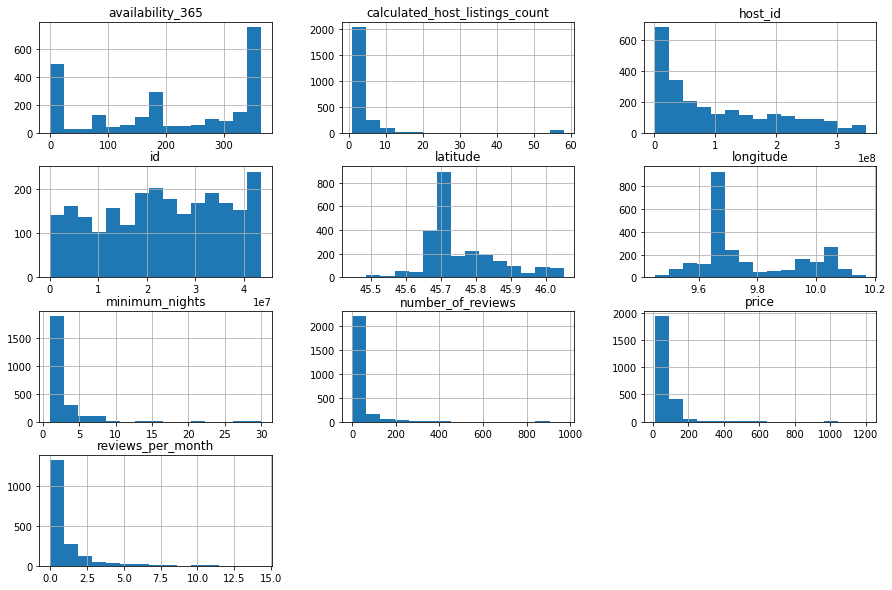

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Correlação**

Correlação significa que existe uma relação entre duas coisas. São variáveis que tendem a explicar o mesmo fenômeno em uma análise, sendo que, em alguns casos, pode-se eliminar a menos importante.

Utilizaremos duas estratégias para identificar as correlações existentes entre as variáveis do nosso *dataset*:

* Matriz de Correlação
* Gerar um *heatmap* 

In [ ]:
# Matriz de Correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.022621,-0.108782,-0.148506,0.100901,0.033150
minimum_nights,-0.022621,1.000000,-0.106252,-0.153737,-0.092560,-0.012672
number_of_reviews,-0.108782,-0.106252,1.000000,0.822094,-0.062287,0.059349
reviews_per_month,-0.148506,-0.153737,0.822094,1.000000,-0.061672,0.018368
calculated_host_listings_count,0.100901,-0.092560,-0.062287,-0.061672,1.000000,-0.000888
availability_365,0.033150,-0.012672,0.059349,0.018368,-0.000888,1.000000


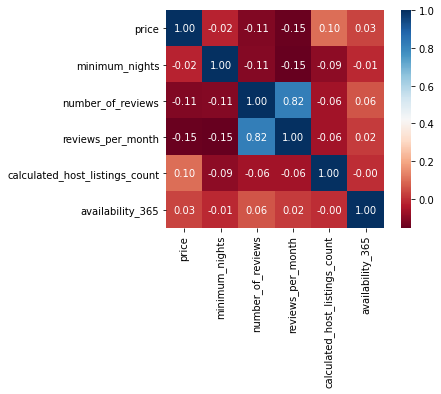

In [ ]:
# 'Heatmap'
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

As variáveis 'reviews_per-month' e 'number_of_revies' são fortemente correlacionadas (82%)

### **Tipo de imóvel mais alugado no Airbnb**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    1814
Private room        575
Hotel room           58
Shared room          12
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.737698
Private room       0.233835
Hotel room         0.023587
Shared room        0.004880
Name: room_type, dtype: float64

### **Qual a localidade mais cara de Bérgamo**

A partir da identiticação do preço médio praticado em cada bairro, verifica-se o mais caro de Bérgamo para locação pelo AirBnB.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lurano                   330.000000
Cisano Bergamasco        234.000000
Gandino                  200.000000
Cenate Sopra             195.000000
Almenno San Salvatore    180.000000
Carobbio degli Angeli    170.000000
Costa Volpino            141.941176
Gazzaniga                139.500000
Villa d'Adda             136.666667
Villongo                 110.375000
Name: price, dtype: float64

Lurano, Cisano Berganasci e Gandino são os 3 locais que estão com média de preço superior a de lugares como Villongo, Villa dÁgua e Gazzaniga.

Por se tratar de preços médios, uma análise apenas destas informações podem não ser suficientes. Então iremos obter a quantidade de imóveis ofertados em Lurano.

In [ ]:
# ver quantidade de imóveis em Lurano (tem um imovel apenas)
print(df_clean[df_clean.neighbourhood == "Lurano"].shape)

# ver o único elemento de entrada em Lurano
df_clean[df_clean.neighbourhood == "Lurano"]

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1297,24194275,Tenuta La Esmeralda Country House,82595886,Alberto,Lurano,45.57221,9.64629,Entire home/apt,330,3,5,2019-09-11,0.22,7,162


Como há um único registro para Lurano, falar em média não pe uma abodagem suficiente. Outras estratégias precisam ser pensadas para identificar o bairro mais caro de Bérgamo.

### **Disposição Espacial dos Imóveis - Bérgamo**

Pelas coordenadas de Latitudes e Longitudes para os imóveis, plota-se o mapa:

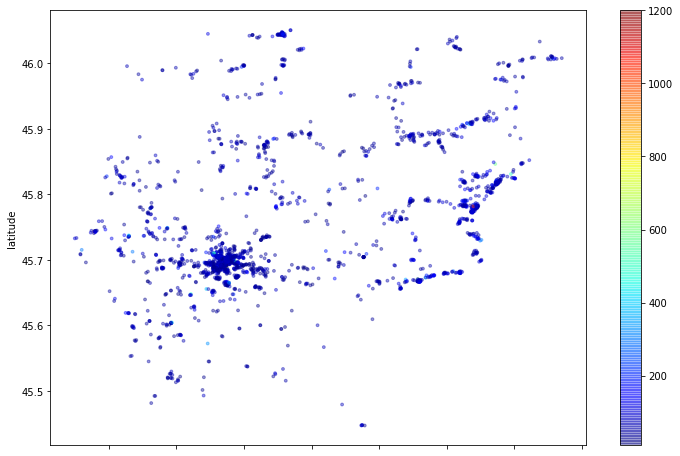

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.